# PROJET 9 Produisez une étude de marché avec Python

In [1]:
#Importation des librairies

import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

import seaborn as sns
sns.set()

import warnings
warnings.simplefilter("ignore")

pd.options.display.float_format = '{:20,.2f}'.format

In [2]:
#Importation des données

    df_disponibiliteAlimentaire_2017=pd.read_csv(r'C:\Users\franc\Desktop\DATA\PROJET 9 Produisez une étude de marché avec R ou Python\Données\DAN-P9-data\DisponibiliteAlimentaire_2017.csv', decimal=".", index_col=0)
df_population=pd.read_csv(r'C:\Users\franc\Desktop\DATA\PROJET 9 Produisez une étude de marché avec R ou Python\Données\DAN-P9-data\Population_2000_2018.csv', decimal=".", index_col=0)
df_stabilite_politique=pd.read_csv(r'C:\Users\franc\Desktop\DATA\PROJET 9 Produisez une étude de marché avec R ou Python\stabilité politique.csv', decimal=".", index_col=0)
df_pib=pd.read_csv(r'C:\Users\franc\Desktop\DATA\PROJET 9 Produisez une étude de marché avec R ou Python\pib.csv', decimal=".", index_col=0)


### Population

In [3]:
#Affichage du df_population
print('df_population 2000-2018')
display(df_population.head())
display(df_population.shape)
display(df_population.dtypes)
display(df_population.info())

df_population 2000-2018


,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
Code Domaine,,,,,,,,,,,,,,
OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2000,2000,1000 personnes,"20,779.95",X,Sources internationales sûres,NaN
OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2001,2001,1000 personnes,"21,606.99",X,Sources internationales sûres,NaN
OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2002,2002,1000 personnes,"22,600.77",X,Sources internationales sûres,NaN
OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2003,2003,1000 personnes,"23,680.87",X,Sources internationales sûres,NaN
OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2004,2004,1000 personnes,"24,726.68",X,Sources internationales sûres,NaN


(4411, 14)

Domaine                    object
Code zone                   int64
Zone                       object
Code Élément                int64
Élément                    object
Code Produit                int64
Produit                    object
Code année                  int64
Année                       int64
Unité                      object
Valeur                    float64
Symbole                    object
Description du Symbole     object
Note                       object
dtype: object

<class 'pandas.core.frame.DataFrame'>
Index: 4411 entries, OA to OA
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Domaine                 4411 non-null   object 
 1   Code zone               4411 non-null   int64  
 2   Zone                    4411 non-null   object 
 3   Code Élément            4411 non-null   int64  
 4   Élément                 4411 non-null   object 
 5   Code Produit            4411 non-null   int64  
 6   Produit                 4411 non-null   object 
 7   Code année              4411 non-null   int64  
 8   Année                   4411 non-null   int64  
 9   Unité                   4411 non-null   object 
 10  Valeur                  4411 non-null   float64
 11  Symbole                 4411 non-null   object 
 12  Description du Symbole  4411 non-null   object 
 13  Note                    258 non-null    object 
dtypes: float64(1), int64(5), object(8)
memory usag

None

In [4]:
#Renommage de la colonne Valeur en Population
df_population=df_population.rename(columns={'Valeur':'Population'})
df_population=df_population.reset_index()

#Filtre pour conserver les colonnes Zones, Année, Population
df_population = df_population[['Zone','Année','Population']].copy()
df_population['Population']= df_population['Population']*1000 #Multiplier la population par 1000
df_population= df_population[df_population['Année']==2017] #Filtre sur année 2017

df_population.head()

,Zone,Année,Population
17,Afghanistan,2017,"36,296,113.00"
36,Afrique du Sud,2017,"57,009,756.00"
55,Albanie,2017,"2,884,169.00"
74,Algérie,2017,"41,389,189.00"
93,Allemagne,2017,"82,658,409.00"


In [5]:
#Affichage du pourcentage de valeurs manquantes
print('% de valeurs manquantes')
display(df_population.isna().mean())

#Recherche de valeurs en double 
print('valeurs en double')
display(df_population.duplicated().sum())

display(df_population.shape)

% de valeurs manquantes


Zone                         0.00
Année                        0.00
Population                   0.00
dtype: float64

valeurs en double


0

(236, 3)

In [6]:
#Examen des valeurs de notre df_population 
df_population.describe() #On a une valeur max de 1.4 Milliards 

,Année,Population
count,236.00,236.00
mean,"2,017.00","31,983,619.11"
std,0.00,"131,894,884.73"
min,"2,017.00",793.00
25%,"2,017.00","380,303.25"
50%,"2,017.00","5,203,510.50"
75%,"2,017.00","19,308,417.75"
max,"2,017.00","1,421,021,791.00"


<AxesSubplot:>

 nous avons 2 outliers dans la colonne population


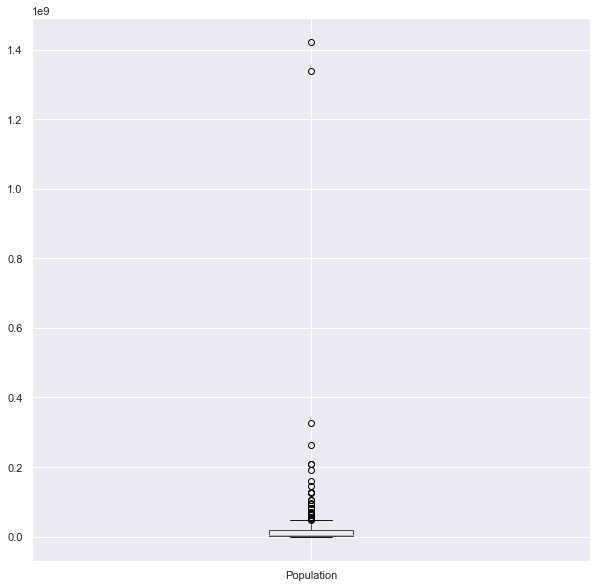

In [7]:
#Affichage du boxplot pour détecter les outliers potentiels 
plt.figure(figsize=(10, 10))
display(df_population.boxplot('Population'))
print(' nous avons 2 outliers dans la colonne population')

In [8]:
#Affichage des valeurs de population par ordre décroissante
display(df_population.sort_values(by=['Population'], ascending=False))
print("La Chine, Continentale & l'Inde ont des valeurs extrêmes. \nNous devrons retirer de notre analyse pour ne pas fausser l'analyse en composante principale")

,Zone,Année,Population
823,"Chine, continentale",2017,"1,421,021,791.00"
1952,Inde,2017,"1,338,676,785.00"
1230,États-Unis d'Amérique,2017,"325,084,756.00"
1971,Indonésie,2017,"264,650,963.00"
3029,Pakistan,2017,"207,906,209.00"
...,...,...,...
2725,Montserrat,2017,"4,984.00"
1781,Îles Falkland (Malvinas),2017,"3,068.00"
2896,Nioué,2017,"1,609.00"
4143,Tokélaou,2017,"1,300.00"


La Chine, Continentale & l'Inde ont des valeurs extrêmes. 
Nous devrons retirer de notre analyse pour ne pas fausser l'analyse en composante principale


### Viande de poulet en 2017

In [9]:
#Affichage du dataframe df_disponibiliteAlimentaire_2017 et de ses caractéristiques
print('df_disponibilité alimentaire_2017')
display(df_disponibiliteAlimentaire_2017.head())
display(df_disponibiliteAlimentaire_2017.shape)
display(df_disponibiliteAlimentaire_2017.dtypes)
display(df_disponibiliteAlimentaire_2017.info())

df_disponibilité alimentaire_2017


,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
Code Domaine,,,,,,,,,,,,,
FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2511,Blé et produits,2017,2017,Milliers de tonnes,"4,281.00",S,Données standardisées
FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,"2,302.00",S,Données standardisées
FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5072,Variation de stock,2511,Blé et produits,2017,2017,Milliers de tonnes,-119.00,S,Données standardisées
FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5911,Exportations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,0.00,S,Données standardisées
FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5301,Disponibilité intérieure,2511,Blé et produits,2017,2017,Milliers de tonnes,"6,701.00",S,Données standardisées


(176600, 13)

Domaine                    object
Code zone                   int64
Zone                       object
Code Élément                int64
Élément                    object
Code Produit                int64
Produit                    object
Code année                  int64
Année                       int64
Unité                      object
Valeur                    float64
Symbole                    object
Description du Symbole     object
dtype: object

<class 'pandas.core.frame.DataFrame'>
Index: 176600 entries, FBS to FBS
Data columns (total 13 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Domaine                 176600 non-null  object 
 1   Code zone               176600 non-null  int64  
 2   Zone                    176600 non-null  object 
 3   Code Élément            176600 non-null  int64  
 4   Élément                 176600 non-null  object 
 5   Code Produit            176600 non-null  int64  
 6   Produit                 176600 non-null  object 
 7   Code année              176600 non-null  int64  
 8   Année                   176600 non-null  int64  
 9   Unité                   176600 non-null  object 
 10  Valeur                  176600 non-null  float64
 11  Symbole                 176600 non-null  object 
 12  Description du Symbole  176600 non-null  object 
dtypes: float64(1), int64(5), object(7)
memory usage: 18.9+ MB


None

In [10]:
#Affichage de la liste des produits
df_disponibiliteAlimentaire_2017['Produit'].unique()

array(['Blé et produits', 'Riz et produits', 'Orge et produits',
       'Maïs et produits', 'Seigle et produits', 'Avoine',
       'Millet et produits', 'Sorgho et produits', 'Céréales, Autres',
       'Pommes de Terre et produits', 'Ignames', 'Racines nda',
       'Sucre, canne', 'Sucre, betterave', 'Sucre Eq Brut',
       'Edulcorants Autres', 'Miel', 'Haricots', 'Pois',
       'Légumineuses Autres et produits', 'Noix et produits', 'Soja',
       'Arachides Decortiquees', 'Graines de tournesol',
       'Graines Colza/Moutarde', 'Graines de coton', 'Coco (Incl Coprah)',
       'Sésame', 'Olives', 'Plantes Oleiferes, Autre', 'Huile de Soja',
       "Huile d'Arachide", 'Huile de Tournesol',
       'Huile de Colza&Moutarde', 'Huile Graines de Coton',
       'Huile de Palmistes', 'Huile de Palme', 'Huile de Coco',
       'Huile de Sésame', "Huile d'Olive", 'Huile de Son de Riz',
       'Huile de Germe de Maïs', 'Huil Plantes Oleif Autr',
       'Tomates et produits', 'Oignons', 'Légumes, 

In [11]:
#Affichage des données sur la viande de volaille & Création d'un nouveau df_volaille_2017
df_volaille_2017 = df_disponibiliteAlimentaire_2017.loc[df_disponibiliteAlimentaire_2017['Produit']=='Viande de Volailles']
df_volaille_2017 =df_volaille_2017.reset_index()
df_volaille_2017=df_volaille_2017.rename(columns={'Valeur':'Quantite'})
df_volaille_2017= df_volaille_2017[['Zone','Produit','Élément','Unité','Quantite']].copy()
df_volaille_2017.head()

,Zone,Produit,Élément,Unité,Quantite
0,Afghanistan,Viande de Volailles,Production,Milliers de tonnes,28.00
1,Afghanistan,Viande de Volailles,Importations - Quantité,Milliers de tonnes,29.00
2,Afghanistan,Viande de Volailles,Variation de stock,Milliers de tonnes,0.00
3,Afghanistan,Viande de Volailles,Disponibilité intérieure,Milliers de tonnes,57.00
4,Afghanistan,Viande de Volailles,Pertes,Milliers de tonnes,2.00


In [12]:
#Affichage des éléments
df_volaille_2017['Élément'].unique()

array(['Production', 'Importations - Quantité', 'Variation de stock',
       'Disponibilité intérieure', 'Pertes', 'Résidus', 'Nourriture',
       'Disponibilité alimentaire en quantité (kg/personne/an)',
       'Disponibilité alimentaire (Kcal/personne/jour)',
       'Disponibilité de protéines en quantité (g/personne/jour)',
       'Disponibilité de matière grasse en quantité (g/personne/jour)',
       'Exportations - Quantité', 'Alimentation pour touristes',
       'Traitement', 'Autres utilisations (non alimentaire)',
       'Aliments pour animaux', 'Semences'], dtype=object)

In [13]:
#Sélection des variables pertinentes
filter_param = df_volaille_2017['Élément'].isin(['Production','Importations - Quantité',
       'Exportations - Quantité', 'Disponibilité intérieure','Nourriture'])

df_volaille_2017= df_volaille_2017[filter_param]
df_volaille_2017.head()


,Zone,Produit,Élément,Unité,Quantite
0,Afghanistan,Viande de Volailles,Production,Milliers de tonnes,28.00
1,Afghanistan,Viande de Volailles,Importations - Quantité,Milliers de tonnes,29.00
3,Afghanistan,Viande de Volailles,Disponibilité intérieure,Milliers de tonnes,57.00
6,Afghanistan,Viande de Volailles,Nourriture,Milliers de tonnes,55.00
11,Afrique du Sud,Viande de Volailles,Production,Milliers de tonnes,"1,667.00"


In [14]:
#Pourcentage de valeurs manquantes
print('% de valeurs manquantes')
display(df_volaille_2017.isna().mean())

#Recherche de valeurs en double 
print('valeurs en double')
display(df_volaille_2017.duplicated().sum())

% de valeurs manquantes


Zone                       0.00
Produit                    0.00
Élément                    0.00
Unité                      0.00
Quantite                   0.00
dtype: float64

valeurs en double


0

In [15]:
#Pivot du dataframe
df_volaille_2017 = df_volaille_2017.pivot(index='Zone',columns='Élément',values='Quantite')  
df_volaille_2017

Élément,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Production
Zone,,,,,
Afghanistan,57.00,NaN,29.00,55.00,28.00
Afrique du Sud,"2,118.00",63.00,514.00,"2,035.00","1,667.00"
Albanie,47.00,0.00,38.00,47.00,13.00
Algérie,277.00,0.00,2.00,264.00,275.00
Allemagne,"1,739.00",646.00,842.00,"1,609.00","1,514.00"
...,...,...,...,...,...
Émirats arabes unis,412.00,94.00,433.00,412.00,48.00
Équateur,341.00,0.00,0.00,324.00,340.00
États-Unis d'Amérique,"18,266.00","3,692.00",123.00,"18,100.00","21,914.00"


In [16]:
#Affichage des statistiques de notre df_volaille_2017
display(df_volaille_2017.describe())
print("Nous avons des outliers potentiels car nous avons des valeurs maximales ")

Élément,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Production
count,170.00,135.00,170.00,170.00,168.00
mean,687.59,132.19,89.53,657.05,725.19
std,"2,187.18",513.78,186.67,"2,136.55","2,501.46"
min,2.00,0.00,0.00,2.00,0.00
25%,30.50,0.00,3.00,28.50,13.75
50%,100.00,3.00,16.00,99.50,70.00
75%,368.25,32.00,81.25,365.25,409.75
max,"18,266.00","4,223.00","1,069.00","18,100.00","21,914.00"


Nous avons des outliers potentiels car nous avons des valeurs maximales 


<AxesSubplot:>

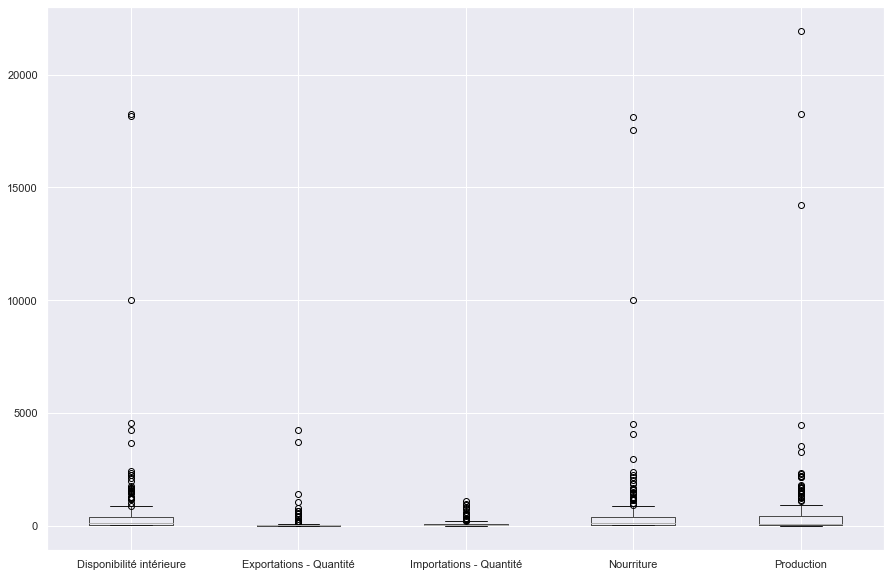

In [17]:
#Affichage de boxplots pour visualiser les données 
plt.figure(figsize=(15, 10))
df_volaille_2017.boxplot()

In [18]:
display(df_volaille_2017.sort_values(by=['Exportations - Quantité'], ascending=False))

Élément,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Production
Zone,,,,,
Brésil,"9,982.00","4,223.00",3.00,"9,982.00","14,201.00"
États-Unis d'Amérique,"18,266.00","3,692.00",123.00,"18,100.00","21,914.00"
Pays-Bas,372.00,"1,418.00",608.00,346.00,"1,100.00"
Pologne,"1,156.00","1,025.00",55.00,"1,150.00","2,351.00"
Thaïlande,881.00,796.00,2.00,896.00,"1,676.00"
...,...,...,...,...,...
Timor-Leste,5.00,NaN,11.00,5.00,1.00
Turkménistan,27.00,NaN,9.00,26.00,20.00
Vanuatu,3.00,NaN,4.00,3.00,1.00


Le Brésil & les États-Unis d'Amérique ont des valeurs extrêmes au niveau de l'exportation de volaille

### Stabilité politique

In [19]:
print('df_stabilite_politique')
display(df_stabilite_politique.head())
display(df_stabilite_politique.shape)
display(df_stabilite_politique.dtypes)
display(df_stabilite_politique.info())

df_stabilite_politique


,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
Code Domaine,,,,,,,,,,,,,,
FS,Données de la sécurité alimentaire,2,Afghanistan,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2000,2000,indice,-2.44,X,Ciffre de sources internationales,NaN
FS,Données de la sécurité alimentaire,2,Afghanistan,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2002,2002,indice,-2.04,X,Ciffre de sources internationales,NaN
FS,Données de la sécurité alimentaire,2,Afghanistan,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2003,2003,indice,-2.20,X,Ciffre de sources internationales,NaN
FS,Données de la sécurité alimentaire,2,Afghanistan,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2004,2004,indice,-2.30,X,Ciffre de sources internationales,NaN
FS,Données de la sécurité alimentaire,2,Afghanistan,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2005,2005,indice,-2.07,X,Ciffre de sources internationales,NaN


(3908, 14)

Domaine                    object
Code zone                   int64
Zone                       object
Code Élément                int64
Élément                    object
Code Produit                int64
Produit                    object
Code année                  int64
Année                       int64
Unité                      object
Valeur                    float64
Symbole                    object
Description du Symbole     object
Note                      float64
dtype: object

<class 'pandas.core.frame.DataFrame'>
Index: 3908 entries, FS to FS
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Domaine                 3908 non-null   object 
 1   Code zone               3908 non-null   int64  
 2   Zone                    3908 non-null   object 
 3   Code Élément            3908 non-null   int64  
 4   Élément                 3908 non-null   object 
 5   Code Produit            3908 non-null   int64  
 6   Produit                 3908 non-null   object 
 7   Code année              3908 non-null   int64  
 8   Année                   3908 non-null   int64  
 9   Unité                   3908 non-null   object 
 10  Valeur                  3908 non-null   float64
 11  Symbole                 3908 non-null   object 
 12  Description du Symbole  3908 non-null   object 
 13  Note                    0 non-null      float64
dtypes: float64(2), int64(5), object(7)
memory usag

None

In [20]:
#On renomme la colonne valeur en indice stabilite
df_stabilite_politique=df_stabilite_politique.rename(columns={'Valeur':'indice stabilite'}) 
df_stabilite_politique=df_stabilite_politique.reset_index()

#Filtre sur année 2017 et sur les variables pertinentes
df_stabilite_politique=df_stabilite_politique.loc[df_stabilite_politique['Année']==2017]
df_stabilite_politique= df_stabilite_politique[['Zone','Année','indice stabilite']].copy()
df_stabilite_politique.head()

,Zone,Année,indice stabilite
16,Afghanistan,2017,-2.80
36,Afrique du Sud,2017,-0.28
56,Albanie,2017,0.38
76,Algérie,2017,-0.92
96,Allemagne,2017,0.59


In [21]:
#Pourcentage de valeurs manquantes
print('% de valeurs manquantes')
display(df_volaille_2017.isna().mean())

#Recherche de valeurs en double 
print('valeurs en double')
display(df_volaille_2017.duplicated().sum())

display(df_volaille_2017.shape)

% de valeurs manquantes


Élément
Disponibilité intérieure                   0.00
Exportations - Quantité                    0.21
Importations - Quantité                    0.00
Nourriture                                 0.00
Production                                 0.01
dtype: float64

valeurs en double


1

(170, 5)

### PIB

In [22]:
#Affichage du df_pib et ses principales caractéristiques
print('df_pib')
display(df_pib.head())
display(df_pib.shape)
display(df_pib.dtypes)
display(df_pib.info())

df_pib


,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
Code Domaine,,,,,,,,,,,,,,
MK,Indicateurs macro,4,Afghanistan,6110,Valeur US $,22008,Produit Intérieur Brut,2016,2016,millions,"18,019.56",X,Ciffre de sources internationales,NaN
MK,Indicateurs macro,4,Afghanistan,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2016,2016,US$,509.27,X,Ciffre de sources internationales,NaN
MK,Indicateurs macro,4,Afghanistan,6129,Croissance annuelle US$,22008,Produit Intérieur Brut,2016,2016,%,-3.71,E,Valeur estimée,NaN
MK,Indicateurs macro,4,Afghanistan,61290,Croissance annuelle US$ par habitant,22008,Produit Intérieur Brut,2016,2016,%,-6.34,E,Valeur estimée,NaN
MK,Indicateurs macro,4,Afghanistan,6110,Valeur US $,22008,Produit Intérieur Brut,2017,2017,millions,"18,896.35",X,Ciffre de sources internationales,NaN


(4220, 14)

Domaine                    object
Code zone (M49)             int64
Zone                       object
Code Élément                int64
Élément                    object
Code Produit                int64
Produit                    object
Code année                  int64
Année                       int64
Unité                      object
Valeur                    float64
Symbole                    object
Description du Symbole     object
Note                      float64
dtype: object

<class 'pandas.core.frame.DataFrame'>
Index: 4220 entries, MK to MK
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Domaine                 4220 non-null   object 
 1   Code zone (M49)         4220 non-null   int64  
 2   Zone                    4220 non-null   object 
 3   Code Élément            4220 non-null   int64  
 4   Élément                 4220 non-null   object 
 5   Code Produit            4220 non-null   int64  
 6   Produit                 4220 non-null   object 
 7   Code année              4220 non-null   int64  
 8   Année                   4220 non-null   int64  
 9   Unité                   4220 non-null   object 
 10  Valeur                  4220 non-null   float64
 11  Symbole                 4220 non-null   object 
 12  Description du Symbole  4220 non-null   object 
 13  Note                    0 non-null      float64
dtypes: float64(2), int64(5), object(7)
memory usag

None

In [23]:
#Filtre sur 2017 et sur les colonnes pertinentes 
df_pib=df_pib.reset_index()
df_pib=df_pib.loc[df_pib['Année']==2017].copy()
df_pib
df_pib=df_pib.rename(columns={'Valeur':'PIB $ en million'}) # On renomme Valeur en PIB 
df_pib= df_pib[['Zone','Élément','Année', 'Unité', 'PIB $ en million']].copy()
df_pib

,Zone,Élément,Année,Unité,PIB $ en million
4,Afghanistan,Valeur US $,2017,millions,"18,896.35"
5,Afghanistan,Valeur US $ par habitant,2017,US$,520.62
6,Afghanistan,Croissance annuelle US$,2017,%,4.87
7,Afghanistan,Croissance annuelle US$ par habitant,2017,%,2.23
24,Afrique du Sud,Valeur US $,2017,millions,"349,006.69"
...,...,...,...,...,...
4187,Zambie,Croissance annuelle US$ par habitant,2017,%,17.08
4204,Zimbabwe,Valeur US $,2017,millions,"22,040.90"
4205,Zimbabwe,Valeur US $ par habitant,2017,US$,"1,548.19"
4206,Zimbabwe,Croissance annuelle US$,2017,%,7.26


In [24]:
#Affichage des différents éléments
df_pib['Élément'].unique()

array(['Valeur US $', 'Valeur US $ par habitant',
       'Croissance annuelle US$', 'Croissance annuelle US$ par habitant'],
      dtype=object)

In [25]:
#Sélection des variables pertinentes
filter_param1 = df_pib['Élément'].isin(['Valeur US $'])

df_pib= df_pib[filter_param1]
df_pib

,Zone,Élément,Année,Unité,PIB $ en million
4,Afghanistan,Valeur US $,2017,millions,"18,896.35"
24,Afrique du Sud,Valeur US $,2017,millions,"349,006.69"
44,Albanie,Valeur US $,2017,millions,"13,019.73"
64,Algérie,Valeur US $,2017,millions,"170,096.98"
84,Allemagne,Valeur US $,2017,millions,"3,690,849.15"
...,...,...,...,...,...
4124,Venezuela (République bolivarienne du),Valeur US $,2017,millions,"247,930.22"
4144,Viet Nam,Valeur US $,2017,millions,"223,779.87"
4164,Yémen,Valeur US $,2017,millions,"20,739.38"
4184,Zambie,Valeur US $,2017,millions,"25,868.16"


In [26]:
#Pourcentage de valeurs manquantes
print('% de valeurs manquantes')
display(df_pib.isna().mean())

#Recherche de valeurs en double 
print('valeurs en double')
display(df_pib.duplicated().sum())

display(df_pib.shape)

% de valeurs manquantes


Zone                               0.00
Élément                            0.00
Année                              0.00
Unité                              0.00
PIB $ en million                   0.00
dtype: float64

valeurs en double


0

(211, 5)

## Jointures

### Jointure interne entre df_population et df_pib

In [27]:
#Affichage df_population
df_population

,Zone,Année,Population
17,Afghanistan,2017,"36,296,113.00"
36,Afrique du Sud,2017,"57,009,756.00"
55,Albanie,2017,"2,884,169.00"
74,Algérie,2017,"41,389,189.00"
93,Allemagne,2017,"82,658,409.00"
...,...,...,...
4333,Venezuela (République bolivarienne du),2017,"29,402,484.00"
4352,Viet Nam,2017,"94,600,648.00"
4371,Yémen,2017,"27,834,819.00"
4390,Zambie,2017,"16,853,599.00"


In [28]:
#Affichage df_pib
df_pib

,Zone,Élément,Année,Unité,PIB $ en million
4,Afghanistan,Valeur US $,2017,millions,"18,896.35"
24,Afrique du Sud,Valeur US $,2017,millions,"349,006.69"
44,Albanie,Valeur US $,2017,millions,"13,019.73"
64,Algérie,Valeur US $,2017,millions,"170,096.98"
84,Allemagne,Valeur US $,2017,millions,"3,690,849.15"
...,...,...,...,...,...
4124,Venezuela (République bolivarienne du),Valeur US $,2017,millions,"247,930.22"
4144,Viet Nam,Valeur US $,2017,millions,"223,779.87"
4164,Yémen,Valeur US $,2017,millions,"20,739.38"
4184,Zambie,Valeur US $,2017,millions,"25,868.16"


In [29]:
#Jointure interne entre df_population et df_stabilite_politique
df_pop_pib= df_population.merge(df_pib [['PIB $ en million','Zone']], how='outer', on='Zone', indicator=True)
display(df_pop_pib)

#Vérification de ne pas avoir ommis des données
display(df_pop_pib['_merge'].value_counts())



,Zone,Année,Population,PIB $ en million,_merge
0,Afghanistan,"2,017.00","36,296,113.00","18,896.35",both
1,Afrique du Sud,"2,017.00","57,009,756.00","349,006.69",both
2,Albanie,"2,017.00","2,884,169.00","13,019.73",both
3,Algérie,"2,017.00","41,389,189.00","170,096.98",both
4,Allemagne,"2,017.00","82,658,409.00","3,690,849.15",both
...,...,...,...,...,...
233,Yémen,"2,017.00","27,834,819.00","20,739.38",both
234,Zambie,"2,017.00","16,853,599.00","25,868.16",both
235,Zimbabwe,"2,017.00","14,236,595.00","22,040.90",both
236,Chine,NaN,NaN,"12,702,190.67",right_only


both          209
left_only      27
right_only      2
Name: _merge, dtype: int64

In [30]:
#Vérifications des données sans matching et donc sans donnée PIB en millions
display(df_pop_pib.loc[df_pop_pib['_merge']=='left_only']) 
display(df_pop_pib.loc[df_pop_pib['_merge']=='right_only'])
print("il ne s'agit que de zones et non pas de pays donc nous les supprimons. \nConcernant la Chine, on conserve Chine, continentale")


,Zone,Année,Population,PIB $ en million,_merge
9,Antilles néerlandaises (ex),"2,017.00","275,186.00",NaN,left_only
28,"Bonaire, Saint-Eustache et Saba","2,017.00","25,401.00",NaN,left_only
44,"Chine, Taiwan Province de","2,017.00","23,674,546.00",NaN,left_only
75,Gibraltar,"2,017.00","33,728.00",NaN,left_only
79,Guadeloupe,"2,017.00","399,672.00",NaN,left_only
80,Guam,"2,017.00","164,281.00",NaN,left_only
86,Guyane française,"2,017.00","275,191.00",NaN,left_only
90,Île de Man,"2,017.00","83,598.00",NaN,left_only
91,Îles Anglo-Normandes,"2,017.00","168,665.00",NaN,left_only
94,Îles Falkland (Malvinas),"2,017.00","3,068.00",NaN,left_only


,Zone,Année,Population,PIB $ en million,_merge
236,Chine,NaN,NaN,"12,702,190.67",right_only
237,Sint Maarten (partie néerlandaise),NaN,NaN,"1,014.00",right_only


il ne s'agit que de zones et non pas de pays donc nous les supprimons. 
Concernant la Chine, on conserve Chine, continentale


In [31]:
#Jointure interne en df_population et df_pib
df_pop_pib= df_population.merge(df_pib [['PIB $ en million','Zone']], how='inner', on='Zone')
display(df_pop_pib.head())
display(df_pop_pib.shape)

,Zone,Année,Population,PIB $ en million
0,Afghanistan,2017,"36,296,113.00","18,896.35"
1,Afrique du Sud,2017,"57,009,756.00","349,006.69"
2,Albanie,2017,"2,884,169.00","13,019.73"
3,Algérie,2017,"41,389,189.00","170,096.98"
4,Allemagne,2017,"82,658,409.00","3,690,849.15"


(209, 4)

### Jointure interne entre df_population et df_stabilite_politique

In [32]:
#Jointure interne entre df_population et df_stabilite_politique
df_pop_pib_politique= df_pop_pib.merge(df_stabilite_politique [['indice stabilite','Zone']], how='left', on='Zone')#, indicator=True)
display(df_pop_pib_politique)


,Zone,Année,Population,PIB $ en million,indice stabilite
0,Afghanistan,2017,"36,296,113.00","18,896.35",-2.80
1,Afrique du Sud,2017,"57,009,756.00","349,006.69",-0.28
2,Albanie,2017,"2,884,169.00","13,019.73",0.38
3,Algérie,2017,"41,389,189.00","170,096.98",-0.92
4,Allemagne,2017,"82,658,409.00","3,690,849.15",0.59
...,...,...,...,...,...
204,Venezuela (République bolivarienne du),2017,"29,402,484.00","247,930.22",-1.27
205,Viet Nam,2017,"94,600,648.00","223,779.87",0.23
206,Yémen,2017,"27,834,819.00","20,739.38",-2.94
207,Zambie,2017,"16,853,599.00","25,868.16",0.15


In [33]:

display(df_stabilite_politique.loc[df_stabilite_politique['Zone']=='Chine'])
print("pas d'information sur la stabilité politique de la Chine")

,Zone,Année,indice stabilite


pas d'information sur la stabilité politique de la Chine


### Jointure entre df_pop_pib_politique et df_volaille_2017

In [34]:
#Jointure interne
df_merge=df_pop_pib_politique.merge(df_volaille_2017, how='inner', on='Zone')
df_merge.drop(df_merge.columns[[1]], axis=1, inplace=True)


In [35]:
#Affichage du df_final
df_merge.head()

,Zone,Population,PIB $ en million,indice stabilite,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Production
0,Afghanistan,"36,296,113.00","18,896.35",-2.80,57.00,NaN,29.00,55.00,28.00
1,Afrique du Sud,"57,009,756.00","349,006.69",-0.28,"2,118.00",63.00,514.00,"2,035.00","1,667.00"
2,Albanie,"2,884,169.00","13,019.73",0.38,47.00,0.00,38.00,47.00,13.00
3,Algérie,"41,389,189.00","170,096.98",-0.92,277.00,0.00,2.00,264.00,275.00
4,Allemagne,"82,658,409.00","3,690,849.15",0.59,"1,739.00",646.00,842.00,"1,609.00","1,514.00"


In [36]:
#Pourcentage de valeurs manquantes
display(df_merge.isna().mean())

#imputation par la moyenne
df_merge = df_merge.fillna(df_merge.mean()) 
df_merge.head()

Zone                                       0.00
Population                                 0.00
PIB $ en million                           0.00
indice stabilite                           0.02
Disponibilité intérieure                   0.00
Exportations - Quantité                    0.21
Importations - Quantité                    0.00
Nourriture                                 0.00
Production                                 0.01
dtype: float64

,Zone,Population,PIB $ en million,indice stabilite,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Production
0,Afghanistan,"36,296,113.00","18,896.35",-2.80,57.00,133.11,29.00,55.00,28.00
1,Afrique du Sud,"57,009,756.00","349,006.69",-0.28,"2,118.00",63.00,514.00,"2,035.00","1,667.00"
2,Albanie,"2,884,169.00","13,019.73",0.38,47.00,0.00,38.00,47.00,13.00
3,Algérie,"41,389,189.00","170,096.98",-0.92,277.00,0.00,2.00,264.00,275.00
4,Allemagne,"82,658,409.00","3,690,849.15",0.59,"1,739.00",646.00,842.00,"1,609.00","1,514.00"


In [37]:
#Implantation de Zone en tant qu'index
df_merge = df_merge.set_index('Zone')


In [38]:
#Affichage de df_merge
df_merge.head()


,Population,PIB $ en million,indice stabilite,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Production
Zone,,,,,,,,
Afghanistan,"36,296,113.00","18,896.35",-2.80,57.00,133.11,29.00,55.00,28.00
Afrique du Sud,"57,009,756.00","349,006.69",-0.28,"2,118.00",63.00,514.00,"2,035.00","1,667.00"
Albanie,"2,884,169.00","13,019.73",0.38,47.00,0.00,38.00,47.00,13.00
Algérie,"41,389,189.00","170,096.98",-0.92,277.00,0.00,2.00,264.00,275.00
Allemagne,"82,658,409.00","3,690,849.15",0.59,"1,739.00",646.00,842.00,"1,609.00","1,514.00"


In [39]:
# Affichage des caractéristiques 
df_merge.describe()

,Population,PIB $ en million,indice stabilite,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Production
count,169.00,169.00,169.00,169.00,169.00,169.00,169.00,169.00
mean,"43,231,919.75","471,420.49",-0.07,687.02,133.11,89.11,656.29,725.63
std,"154,389,619.74","1,859,646.31",0.90,"2,193.67",458.76,187.14,"2,142.87","2,493.99"
min,"52,045.00",188.20,-2.94,2.00,0.00,0.00,2.00,0.00
25%,"2,845,414.00","11,425.76",-0.63,30.00,0.00,3.00,28.00,14.00
50%,"9,729,823.00","44,179.08",-0.04,98.00,8.00,16.00,98.00,71.00
75%,"29,816,766.00","245,633.49",0.65,357.00,133.11,79.00,348.00,463.00
max,"1,421,021,791.00","19,479,623.00",1.60,"18,266.00","4,223.00","1,069.00","18,100.00","21,914.00"


In [40]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Index: 169 entries, Afghanistan to Zimbabwe
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Population                169 non-null    float64
 1   PIB $ en million          169 non-null    float64
 2   indice stabilite          169 non-null    float64
 3   Disponibilité intérieure  169 non-null    float64
 4   Exportations - Quantité   169 non-null    float64
 5   Importations - Quantité   169 non-null    float64
 6   Nourriture                169 non-null    float64
 7   Production                169 non-null    float64
dtypes: float64(8)
memory usage: 11.9+ KB


#  Détection des outliers avec les Box Plots

<AxesSubplot:ylabel='Disponibilité intérieure'>

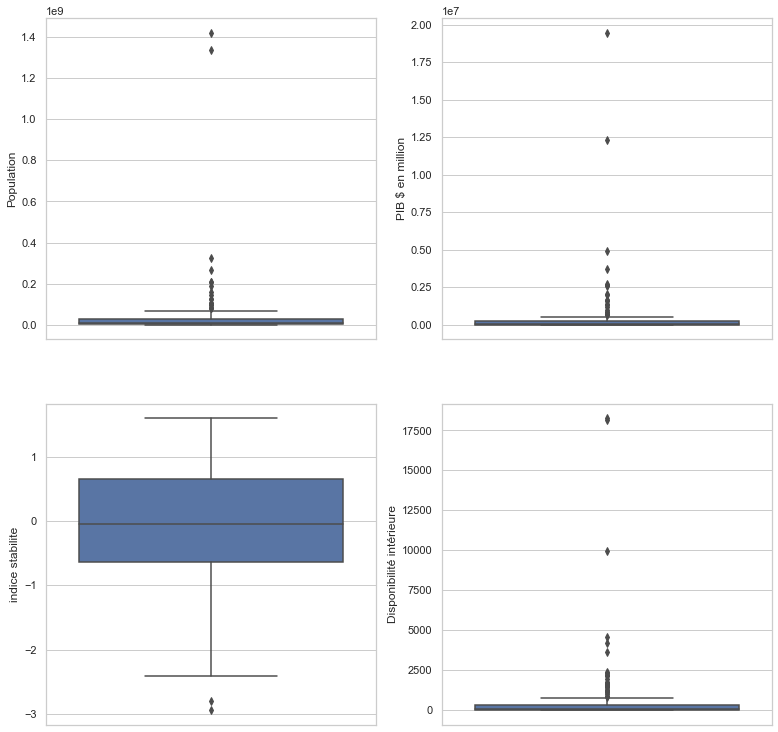

In [41]:
# Visualisation graphique en boxplot de la dispersion des valeurs pour toutes les variables
plt.figure(figsize=(13, 13))
sns.set(style="whitegrid")

plt.subplot(221)
sns.boxplot(data=df_merge,  y='Population')
plt.subplot(222)
sns.boxplot(data=df_merge,  y='PIB $ en million')
plt.subplot(223)
sns.boxplot(data=df_merge,  y='indice stabilite')
plt.subplot(224)
sns.boxplot(data=df_merge,  y='Disponibilité intérieure')



<AxesSubplot:ylabel='Production'>

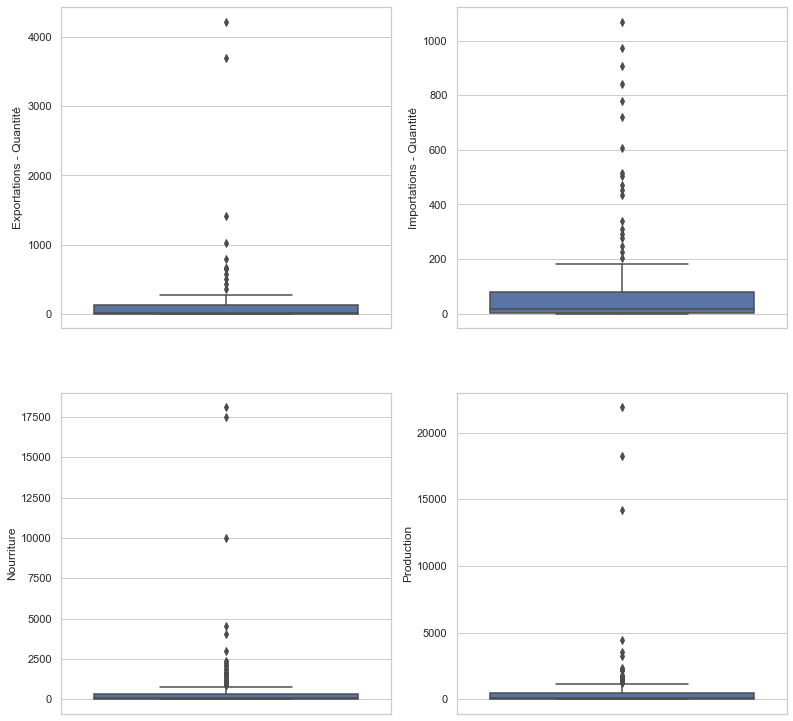

In [42]:
plt.figure(figsize=(13, 13))
sns.set(style="whitegrid")
plt.subplot(221)
sns.boxplot(data=df_merge,  y='Exportations - Quantité')
plt.subplot(222)
sns.boxplot(data=df_merge,  y='Importations - Quantité')
plt.subplot(223)
sns.boxplot(data=df_merge,  y='Nourriture')
plt.subplot(224)
sns.boxplot(data=df_merge,  y='Production')

In [43]:
#Top 10 exportateurs de viande de volaille
top_exportateur= df_merge.sort_values(by=['Exportations - Quantité'], ascending=False)
top_exportateur['Exportations - Quantité'].head(10)

Zone
Brésil                                 4,223.00
États-Unis d'Amérique                  3,692.00
Pays-Bas                               1,418.00
Pologne                                1,025.00
Thaïlande                                796.00
Chine - RAS de Hong-Kong                 663.00
Belgique                                 656.00
Allemagne                                646.00
Chine, continentale                      576.00
France                                   501.00
Name: Exportations - Quantité, dtype: float64

In [44]:
#Top 10 consommateurs de viande de volaille

top_nourriture=df_merge.sort_values(by=['Nourriture'], ascending=False)
top_nourriture['Nourriture'].head(10)

Zone
États-Unis d'Amérique                                            18,100.00
Chine, continentale                                              17,518.00
Brésil                                                            9,982.00
Fédération de Russie                                              4,509.00
Mexique                                                           4,058.00
Inde                                                              2,965.00
Japon                                                             2,359.00
Iran (République islamique d')                                    2,220.00
Royaume-Uni de Grande-Bretagne et d'Irlande du Nord               2,131.00
Afrique du Sud                                                    2,035.00
Name: Nourriture, dtype: float64

## Outliers de population 

In [45]:
#Affichage des plus gros importateurs de viande de volaille
df_top_importateur= df_merge.sort_values('Importations - Quantité', ascending=False)
df_top_importateur['Importations - Quantité'].head(10)


Zone
Japon                                                             1,069.00
Mexique                                                             972.00
Chine - RAS de Hong-Kong                                            907.00
Allemagne                                                           842.00
Royaume-Uni de Grande-Bretagne et d'Irlande du Nord                 779.00
Arabie saoudite                                                     722.00
Pays-Bas                                                            608.00
Afrique du Sud                                                      514.00
France                                                              506.00
Iraq                                                                470.00
Name: Importations - Quantité, dtype: float64

In [46]:
#Affichage des valeurs par ordre décroissant

display(df_merge.sort_values(by=['Population'], ascending=False))

print("Nous remarquons que Chine, Continentale et Inde ont des valeurs extrêmes au niveau de la population.")


#On retire les outliers Chine, Continentale et Inde. 
print("On peut retirer les pays outliers Chine, Continentale et Inde car ils ne sont pas présents dans le top 10 des plus gros importateurs de poulets et donc leur retrait n'affectera pas notre analyse. On retire également la France car le projet porte sur une exportation à l'international")

df_merge = df_merge.drop(["Chine, continentale" , "Inde"])
df_merge

,Population,PIB $ en million,indice stabilite,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Production
Zone,,,,,,,,
"Chine, continentale","1,421,021,791.00","12,310,491.94",-0.07,"18,161.00",576.00,452.00,"17,518.00","18,236.00"
Inde,"1,338,676,785.00","2,624,329.04",-0.76,"3,661.00",4.00,0.00,"2,965.00","3,545.00"
États-Unis d'Amérique,"325,084,756.00","19,479,623.00",0.29,"18,266.00","3,692.00",123.00,"18,100.00","21,914.00"
Indonésie,"264,650,963.00","1,015,618.74",-0.50,"2,323.00",0.00,1.00,"1,904.00","2,301.00"
Pakistan,"207,906,209.00","302,709.72",-2.41,"1,282.00",4.00,2.00,"1,218.00","1,281.00"
...,...,...,...,...,...,...,...,...
Grenade,"110,874.00","1,125.69",1.01,8.00,133.11,7.00,5.00,1.00
Saint-Vincent-et-les Grenadines,"109,827.00",792.18,0.89,8.00,133.11,9.00,8.00,0.00
Antigua-et-Barbuda,"95,426.00","1,467.98",0.75,7.00,0.00,7.00,5.00,0.00


Nous remarquons que Chine, Continentale et Inde ont des valeurs extrêmes au niveau de la population.
On peut retirer les pays outliers Chine, Continentale et Inde car ils ne sont pas présents dans le top 10 des plus gros importateurs de poulets et donc leur retrait n'affectera pas notre analyse. On retire également la France car le projet porte sur une exportation à l'international


,Population,PIB $ en million,indice stabilite,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Production
Zone,,,,,,,,
Afghanistan,"36,296,113.00","18,896.35",-2.80,57.00,133.11,29.00,55.00,28.00
Afrique du Sud,"57,009,756.00","349,006.69",-0.28,"2,118.00",63.00,514.00,"2,035.00","1,667.00"
Albanie,"2,884,169.00","13,019.73",0.38,47.00,0.00,38.00,47.00,13.00
Algérie,"41,389,189.00","170,096.98",-0.92,277.00,0.00,2.00,264.00,275.00
Allemagne,"82,658,409.00","3,690,849.15",0.59,"1,739.00",646.00,842.00,"1,609.00","1,514.00"
...,...,...,...,...,...,...,...,...
Venezuela (République bolivarienne du),"29,402,484.00","247,930.22",-1.27,626.00,0.00,25.00,596.00,600.00
Viet Nam,"94,600,648.00","223,779.87",0.23,"1,206.00",1.00,291.00,"1,166.00",918.00
Yémen,"27,834,819.00","20,739.38",-2.94,246.00,0.00,78.00,237.00,168.00


### Outliers d'exportateurs de viande de volaille

<AxesSubplot:ylabel='Production'>

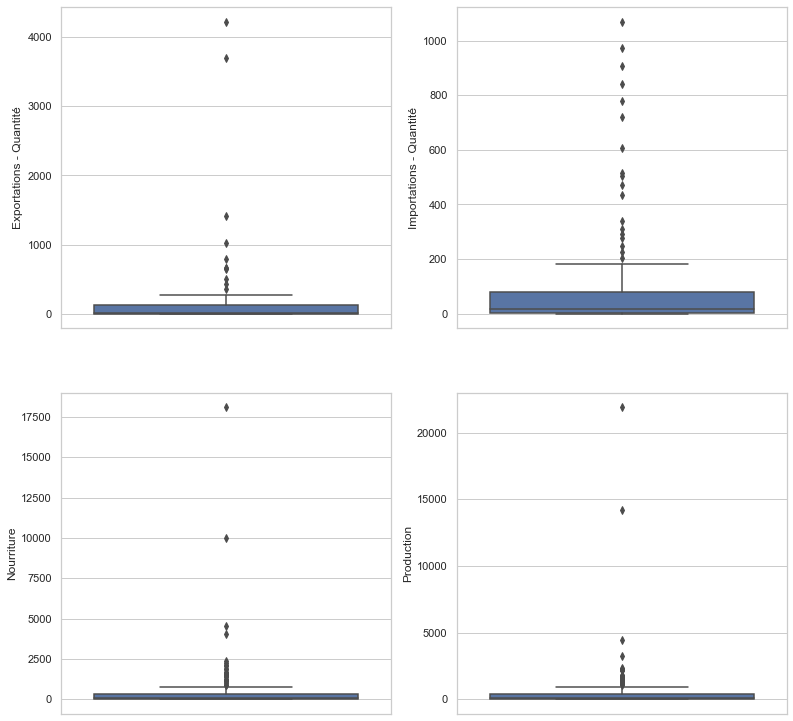

In [47]:
#Affichage des boxplots 
plt.figure(figsize=(13, 13))
plt.subplot(221)
sns.boxplot(data=df_merge,  y='Exportations - Quantité')
plt.subplot(222)
sns.boxplot(data=df_merge,  y='Importations - Quantité')
plt.subplot(223)
sns.boxplot(data=df_merge,  y='Nourriture')
plt.subplot(224)
sns.boxplot(data=df_merge,  y='Production')


On regarde également les outliers au niveau des plus gros exportateurs de poulets et on regarde s'ils ne font pas partie du top 10 importateurs de volaille

In [48]:
#Affichage des valeurs Production par ordre décroissantes
print("Les plus gros exportateurs de poulets")
display(df_merge.sort_values(by=['Exportations - Quantité'], ascending=False))

print("Nous avons deux outliers au niveau des exportateurs de viande de volaille: le Brésil & États-Unis d'Amérique")

print("Les plus gros importateurs de poulets")
display(df_top_importateur.head(10))
print("Nos outliers potentiels États-Unis d'Amérique & Brésil ne font pas parti du top 10 importateurs de viande de volaille et donc leur retrait n'affectera pas notre analyse")

Les plus gros exportateurs de poulets


,Population,PIB $ en million,indice stabilite,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Production
Zone,,,,,,,,
Brésil,"207,833,823.00","2,063,514.69",-0.47,"9,982.00","4,223.00",3.00,"9,982.00","14,201.00"
États-Unis d'Amérique,"325,084,756.00","19,479,623.00",0.29,"18,266.00","3,692.00",123.00,"18,100.00","21,914.00"
Pays-Bas,"17,021,347.00","833,869.64",0.92,372.00,"1,418.00",608.00,346.00,"1,100.00"
Pologne,"37,953,180.00","526,504.23",0.52,"1,156.00","1,025.00",55.00,"1,150.00","2,351.00"
Thaïlande,"69,209,810.00","456,356.81",-0.75,881.00,796.00,2.00,896.00,"1,676.00"
...,...,...,...,...,...,...,...,...
Gabon,"2,064,823.00","14,929.65",-0.10,78.00,0.00,76.00,61.00,4.00
Saint-Kitts-et-Nevis,"52,045.00",996.94,0.65,4.00,0.00,4.00,3.00,0.00
Dominique,"71,458.00",520.70,1.20,4.00,0.00,4.00,3.00,0.00


Nous avons deux outliers au niveau des exportateurs de viande de volaille: le Brésil & États-Unis d'Amérique
Les plus gros importateurs de poulets


,Population,PIB $ en million,indice stabilite,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Production
Zone,,,,,,,,
Japon,"127,502,725.00","4,930,837.37",1.11,"2,415.00",10.00,"1,069.00","2,359.00","2,215.00"
Mexique,"124,777,324.00","1,158,912.02",-0.80,"4,219.00",9.00,972.00,"4,058.00","3,249.00"
Chine - RAS de Hong-Kong,"7,306,322.00","341,241.97",0.83,280.00,663.00,907.00,391.00,24.00
Allemagne,"82,658,409.00","3,690,849.15",0.59,"1,739.00",646.00,842.00,"1,609.00","1,514.00"
Royaume-Uni de Grande-Bretagne et d'Irlande du Nord,"66,727,461.00","2,699,016.72",0.39,"2,234.00",359.00,779.00,"2,131.00","1,814.00"
Arabie saoudite,"33,101,179.00","688,586.09",-0.64,"1,435.00",10.00,722.00,"1,435.00",616.00
Pays-Bas,"17,021,347.00","833,869.64",0.92,372.00,"1,418.00",608.00,346.00,"1,100.00"
Afrique du Sud,"57,009,756.00","349,006.69",-0.28,"2,118.00",63.00,514.00,"2,035.00","1,667.00"
France,"64,842,509.00","2,595,151.05",0.28,"1,573.00",501.00,506.00,"1,485.00","1,750.00"


Nos outliers potentiels États-Unis d'Amérique & Brésil ne font pas parti du top 10 importateurs de viande de volaille et donc leur retrait n'affectera pas notre analyse


In [49]:
#On retire les outliers les États-Unis d'Amérique & Brésil. Suppression de la France car projet à l'exportation  

print("On retire États-Unis d'Amérique & Brésil. On enlève également la France car le projet porte sur une exportation à l'international")

df_final = df_merge.drop(["États-Unis d'Amérique","Brésil", "France"])
df_final

On retire États-Unis d'Amérique & Brésil. On enlève également la France car le projet porte sur une exportation à l'international


,Population,PIB $ en million,indice stabilite,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Production
Zone,,,,,,,,
Afghanistan,"36,296,113.00","18,896.35",-2.80,57.00,133.11,29.00,55.00,28.00
Afrique du Sud,"57,009,756.00","349,006.69",-0.28,"2,118.00",63.00,514.00,"2,035.00","1,667.00"
Albanie,"2,884,169.00","13,019.73",0.38,47.00,0.00,38.00,47.00,13.00
Algérie,"41,389,189.00","170,096.98",-0.92,277.00,0.00,2.00,264.00,275.00
Allemagne,"82,658,409.00","3,690,849.15",0.59,"1,739.00",646.00,842.00,"1,609.00","1,514.00"
...,...,...,...,...,...,...,...,...
Venezuela (République bolivarienne du),"29,402,484.00","247,930.22",-1.27,626.00,0.00,25.00,596.00,600.00
Viet Nam,"94,600,648.00","223,779.87",0.23,"1,206.00",1.00,291.00,"1,166.00",918.00
Yémen,"27,834,819.00","20,739.38",-2.94,246.00,0.00,78.00,237.00,168.00


In [50]:
#Sauvegarde du df dans un fichier CSV
df_final.to_csv(r'C:\Users\franc\Desktop\DATA\PROJET 9 Produisez une étude de marché avec R ou Python\df_final_P9.csv')